In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

In [2]:
from readers.InSAR import InSAR

In [3]:
insar = InSAR('data/time_series_Saarland_Orbit139_update.nc')

In [4]:
df = insar.get_df()

In [5]:
cols = [c for c in df.columns if c.startswith('day_')]

In [7]:
insar.compute_and_remove_outliers()

100%|██████████| 218637/218637 [01:01<00:00, 3553.76it/s]


In [8]:
(insar.zscores[cols].abs() >= 3).sum().sum()

210315

In [9]:
insar.df.isna().sum().sum()

210315

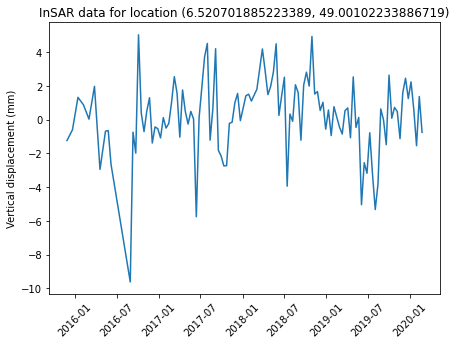

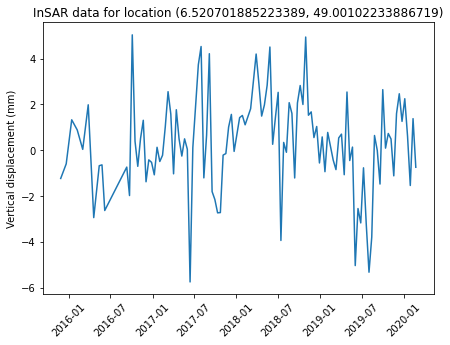

In [12]:
InSAR.plot_insar_series(insar.df_with_outliers, 1)
InSAR.plot_insar_series(insar.df, 1)

In [10]:
insar.df.isna().sum(axis=1).max() # the maximum number of points we removed from one insar site are 7, 7/112 ~ 6.25%

7

In [11]:
insar.df.isna().sum(axis=1).argmax()

53120

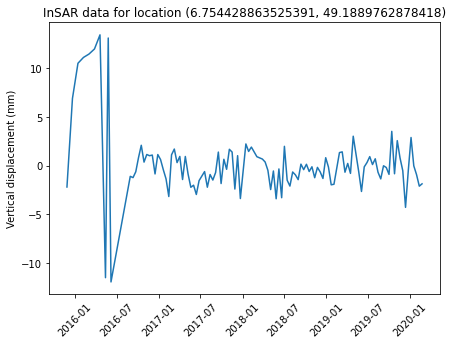

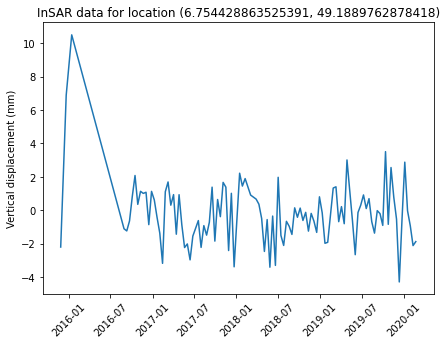

In [14]:
InSAR.plot_insar_series(insar.df_with_outliers, 53120)
InSAR.plot_insar_series(insar.df, 53120) # this one has really weird things

In [22]:
print(insar.zscores[cols].abs().max(axis=1).max()) # highest zscore 9.22
print(insar.zscores[cols].abs().max(axis=1).argmax())

9.225851965218085
201779


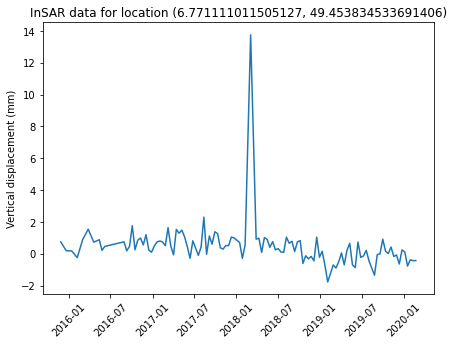

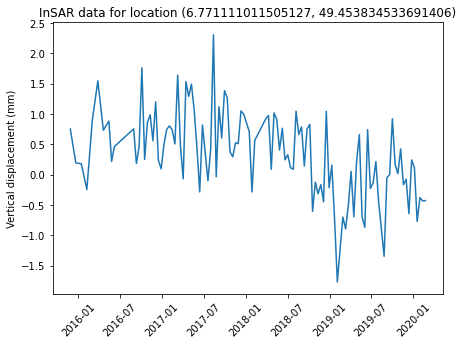

In [23]:
InSAR.plot_insar_series(insar.df_with_outliers, 201779)
InSAR.plot_insar_series(insar.df, 201779)

In [28]:
insar.df[cols].isna().any(axis=1).sum() / insar.df.shape[0] # we removed at least one point from 137759 / 218637 ~ 63% of the sites

0.6300809103674126